In [1]:
# medium article: https://towardsdatascience.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638
# github: https://github.com/bck1990/stock_news_sentiment_analysis/blob/master/Sentiment%20Analysis%20of%20Financial%20News%20Headlines.ipynb

In [2]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
news_tables = {}
tickers = ['VBIV', 'NIO', 'VGT']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [4]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['VBIV']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

VBI Vaccines Announces Submission of Marketing Authorization Application for 3-Antigen Prophylactic Hepatitis B Vaccine to the European Medicines Agency
Nov-23-20 08:00AM  
VBI Vaccines' (VBIV) Early Data on HBV Candidate Positive
Nov-19-20 10:45AM  
VBI Vaccines Announces Positive Interim Phase 2a Data from VBI-1901 in Recurrent GBM
08:00AM  
VBI Vaccines Announces Positive Interim Phase 1b/2a Data for Hepatitis B Immunotherapeutic in Patients with Chronic Infection
Nov-18-20 08:00AM  


In [5]:

parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['VBIV',
  'Nov-23-20',
  '08:00AM',
  'VBI Vaccines Announces Submission of Marketing Authorization Application for 3-Antigen Prophylactic Hepatitis B Vaccine to the European Medicines Agency'],
 ['VBIV',
  'Nov-19-20',
  '10:45AM',
  "VBI Vaccines' (VBIV) Early Data on HBV Candidate Positive"],
 ['VBIV',
  'Nov-19-20',
  '08:00AM',
  'VBI Vaccines Announces Positive Interim Phase 2a Data from VBI-1901 in Recurrent GBM'],
 ['VBIV',
  'Nov-18-20',
  '08:00AM',
  'VBI Vaccines Announces Positive Interim Phase 1b/2a Data for Hepatitis B Immunotherapeutic in Patients with Chronic Infection'],
 ['VBIV',
  'Nov-13-20',
  '08:00AM',
  'VBI Vaccines Presents Phase 3 Sci-B-Vac® Data at The Liver Meeting® 2020'],
 ['VBIV',
  'Nov-12-20',
  '08:47AM',
  'Implied Volatility Surging for VBI Vaccines (VBIV) Stock Options'],
 ['VBIV',
  'Nov-09-20',
  '08:00AM',
  'VBI Vaccines Announces e-Poster Presentation at the Society for Neuro-Oncology (SNO) 2020 Virtual Meeting'],
 ['VBIV',
  'Nov-05-20',
 

In [6]:

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,VBIV,2020-11-23,08:00AM,VBI Vaccines Announces Submission of Marketing...,0.0,1.000,0.000,0.0000
1,VBIV,2020-11-19,10:45AM,VBI Vaccines' (VBIV) Early Data on HBV Candida...,0.0,0.690,0.310,0.5574
2,VBIV,2020-11-19,08:00AM,VBI Vaccines Announces Positive Interim Phase ...,0.0,0.769,0.231,0.5574
3,VBIV,2020-11-18,08:00AM,VBI Vaccines Announces Positive Interim Phase ...,0.0,0.806,0.194,0.5574
4,VBIV,2020-11-13,08:00AM,VBI Vaccines Presents Phase 3 Sci-B-Vac® Data ...,0.0,1.000,0.000,0.0000


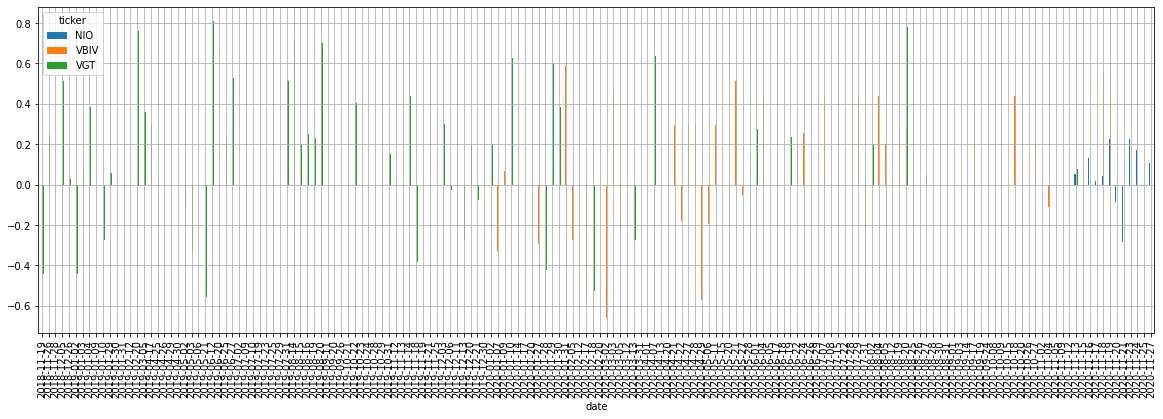

In [7]:
plt.rcParams['figure.figsize'] = [20, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [8]:
parsed_and_scored_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    300 non-null    object 
 1   date      300 non-null    object 
 2   time      300 non-null    object 
 3   headline  300 non-null    object 
 4   neg       300 non-null    float64
 5   neu       300 non-null    float64
 6   pos       300 non-null    float64
 7   compound  300 non-null    float64
dtypes: float64(4), object(4)
memory usage: 18.9+ KB
